In [127]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_students=100
lectures_attended = np.random.randint(0,31,size=num_students)
marks_obtained = np.clip((lectures_attended*0.6 + np.random.normal(0,2,size=num_students)),0,20)
df = pd.DataFrame({
    'Letcures_Attended' :lectures_attended,
    'Marks_Obtained': marks_obtained.round(2)
    
})
df.to_csv('lecture_marks_dataset.csv',index =False)
print("dataset saved as 'lecture_marks_dataset.csv'")

dataset saved as 'lecture_marks_dataset.csv'


In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,linregress

In [131]:
df=pd.read_csv("lecture_marks_dataset.csv")

In [133]:
df.head()

,Letcures_Attended,Marks_Obtained
0,6,0.00
1,19,9.31
2,28,17.15
3,14,9.05
4,10,7.49


In [135]:
print(df.describe())

       Letcures_Attended  Marks_Obtained
count         100.000000      100.000000
mean           16.110000        9.713700
std             9.119737        5.918186
min             0.000000        0.000000
25%             7.750000        4.915000
50%            17.000000       10.330000
75%            24.250000       14.647500
max            30.000000       20.000000


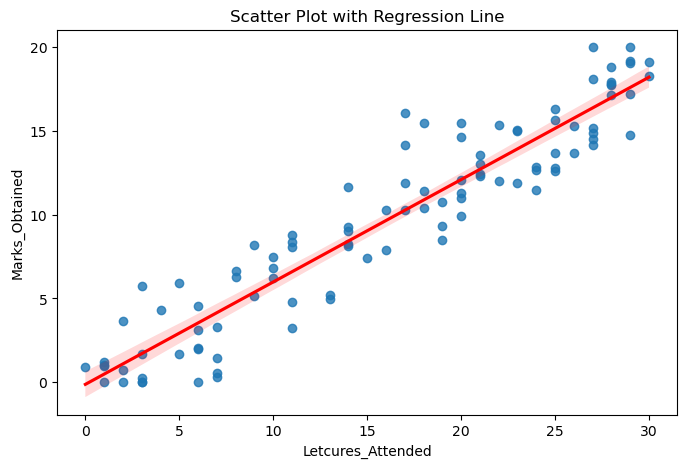

In [137]:
plt.figure(figsize=(8,5))
sns.regplot(x='Letcures_Attended', y='Marks_Obtained', data = df, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line')
plt.savefig("scatter_regression.png")
plt.show()

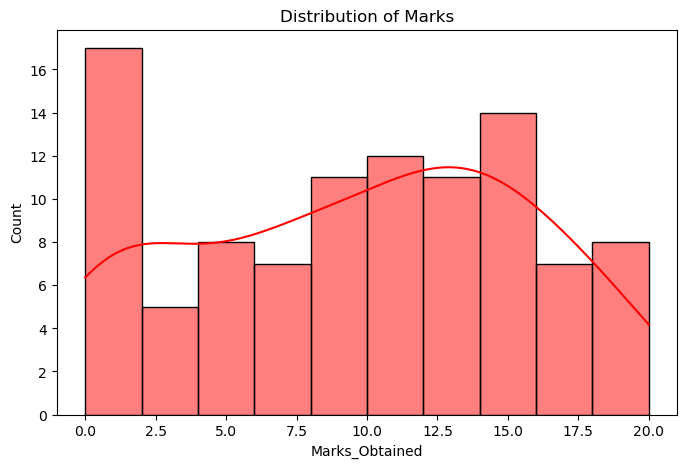

In [139]:
plt.figure(figsize=(8,5))
sns.histplot(df['Marks_Obtained'], bins = 10, kde= True,color = 'red')
plt.title('Distribution of Marks')
plt.savefig("marks_distribution.png")
plt.show()

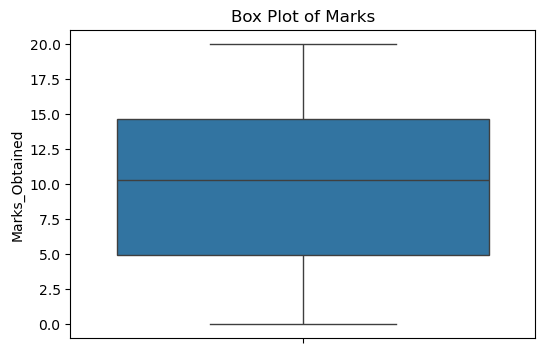

In [141]:
plt.figure(figsize=(6,4))
sns.boxplot(y='Marks_Obtained',data=df)
plt.title('Box Plot of Marks')
plt.savefig("boxplot marks.png")
plt.show()

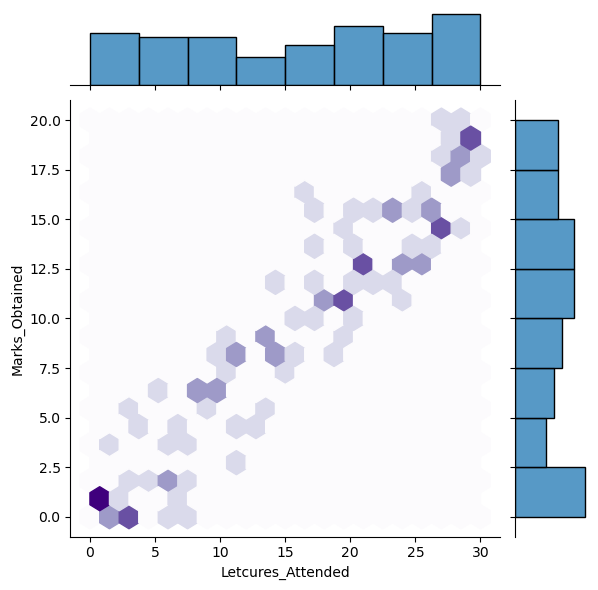

In [143]:
sns.jointplot(x='Letcures_Attended',y='Marks_Obtained', data = df,kind='hex', gridsize=20,cmap='Purples')
plt.savefig("hex joint distrubiution.png")
plt.show()

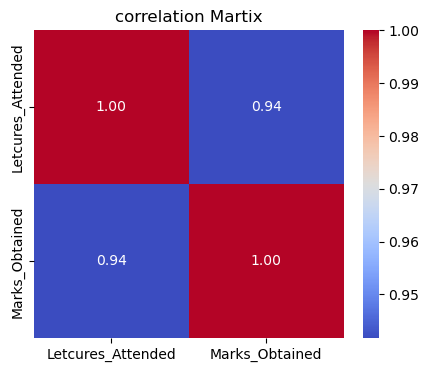

In [145]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("correlation Martix")
plt.savefig("corellation.png")
plt.show()

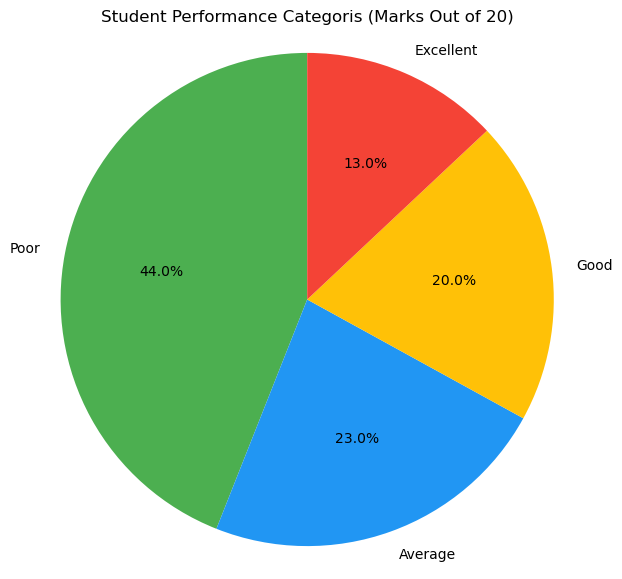

In [149]:
def categorize(marks):
    if marks>=17:
        return 'Excellent'
    elif marks>=13:
        return 'Good'
    elif marks>=9:
        return 'Average'
    else:
        return 'Poor'
df['Category']=df['Marks_Obtained'].apply(categorize)

category_counts=df['Category'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(category_counts, labels=category_counts.index,autopct='%1.1f%%',startangle=90,
        colors=['#4CAF50','#2196F3','#FFC107','#F44336'])
plt.title('Student Performance Categoris (Marks Out of 20)')
plt.axis('equal')
plt.show()

In [152]:
df

,Letcures_Attended,Marks_Obtained,Category
0,6,0.00,Poor
1,19,9.31,Average
2,28,17.15,Excellent
3,14,9.05,Average
4,10,7.49,Poor
...,...,...,...
95,21,13.03,Good
96,28,17.82,Excellent
97,30,19.09,Excellent
98,17,10.26,Average


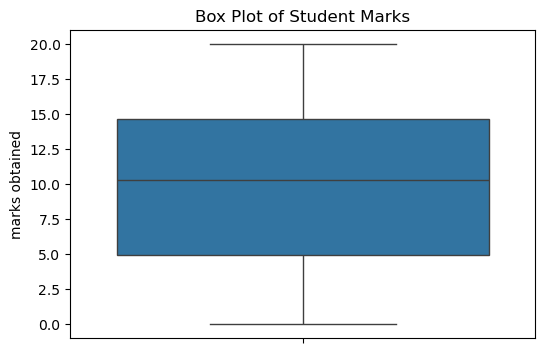

In [110]:
plt.figure(figsize=(6,4))
sns.boxplot(y='Marks_Obtained', data=df)
plt.title('Box Plot of Student Marks')
plt.ylabel('marks obtained')
plt.show()